<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/Functions_and_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: esperimento 1
<p>
Authors: <b> Valerio Pagliarino, Name Surname, Name Surname </b> <p>
Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 01/10/2021

## Configuration

### Clone the GIT

In [2]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

rm: cannot remove './sample_data': No such file or directory
GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 165 (delta 70), reused 50 (delta 14), pack-reused 0
Receiving objects: 100% (165/165), 12.97 MiB | 30.39 MiB/s, done.
Resolving deltas: 100% (70/70), done.


### Install environment

In [ ]:
#This line, if needed, provides the environment with a CERN NOOT installation
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

## Abstract / description

Abstract / description of the experiment. <p>
$f(x) = \frac{g(x)}{h(x)}$ <p>
This is a formula, to be entered with the LaTeX syntax

## Imports

In [9]:
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle

#Pickle with dict of Numpy arrays

## Data analysis

### Read from CSV
The following snippet reads a multi-columns CSV loading data in Pandas: the first column represents the time, the others the signal amplitude on the scope channels

In [ ]:
df = pd.read_csv('content/Electronics-2021-UNITO/data-source/scope1.csv')
print(df)

time = df['time'].to_numpy() # us
ch1  = df['ch1' ].to_numpy() # mV
ch2  = df['ch2' ].to_numpy() # mV

### Raising edge detection (compute the pulse distance)
The following snippet is able to compute the distance between the raising edges of two pulses

In [ ]:
time = np.array()
ch1 = np.array()
ch2 = np.array()

def findRisingEdge(time, data, cursor_threshold, starting_index = 0):
  data = data[starting_index:]
  trigger_ind = 0
  output = np.flatnonzero((data[:-1] < cursor_threshold) & (data[1:] > cursor_threshold))+1
  for b in range(len(data)):
    if ((b > 1) and (b < (len(data)-1))):
      pre2 = data[b-2]
      prev = data[b-1]
      curr = data[b]
      succ = data[b+1]
      if ((pre2 == -1) and (prev == -1) and (curr == 1) and (succ == 1)):
          trigger_ind = b
  return time[trigger_ind + starting_index]


  def findFallingEdge(time, data, cursor_threshold, starting_index = 0):
  data = data[starting_index:]
  trigger_ind = 0
  output = np.flatnonzero((data[:-1] > cursor_threshold) & (data[1:] < cursor_threshold))+1
  for b in range(len(data)):
    if ((b > 1) and (b < (len(data)-1))):
      pre2 = data[b-2]
      prev = data[b-1]
      curr = data[b]
      succ = data[b+1]
      if ((pre2 == -1) and (prev == -1) and (curr == 1) and (succ == 1)):
          trigger_ind = b
  return time[trigger_ind + starting_index]


  def findPulseDistance(time, data, cursor_threshold1, cursor_threshold2, starting_index1 = 0, starting_index2 = 0):
    t1 = findRisingEdge(time, data, cursor_threshold1, starting_index1 = 0)
    if (starting_index2 == 0):
      starting_index2 = np.where(time == t1) + 2
    t2 = findRisingEdge(time, data, cursor_threshold2, starting_index2 = 0)


### Coherent time series

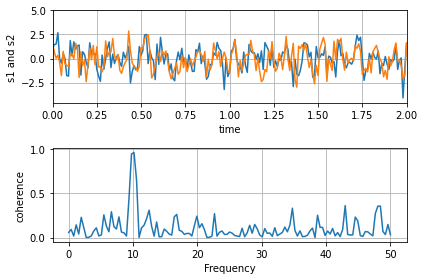

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

### Confidence band of linear fit

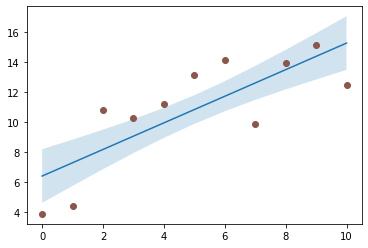

In [11]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

### Spectral density of a signal

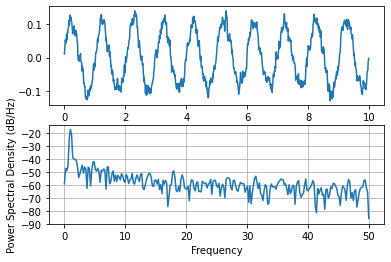

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(t, s)
ax1.psd(s, 512, 1 / dt)

plt.show()

### Signal correlation plot

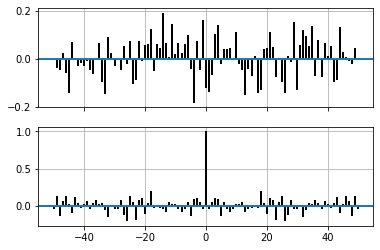

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x, y = np.random.randn(2, 100)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()

### Other plot examples in Python without ROOT:
https://nextjournal.com/bebi5009/plotting-python

### CERN ROOT TH1F
Example of CERN ROOT TH1F object created with the Python interface to ROOT.

Warning in <TROOT::Append>: Replacing existing TH1: gauss (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


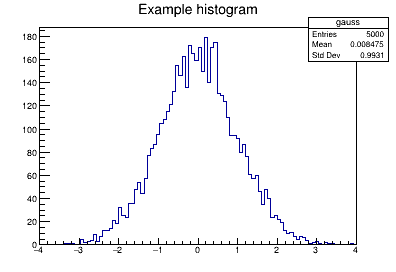

In [13]:
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",400,300)
h.Draw()
c.Draw()

### Bode plot

In [27]:
#To do

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git add .
!git commit -m "Update from Colab"
!git push 

/content/Electronics-2021-UNITO
[main e21b82d] Update from Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (5/5), 353 bytes | 353.00 KiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/valeriopagliarino/Electronics-2021-UNITO.git
   ae81715..e21b82d  main -> main
